Carga Librerias 

In [44]:
# Librerias comunes 

import pandas as pd
import numpy as np

# Librerias de Graficos 
#------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text


# Librerias de Modelos de Machine Learning
#-----------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split

# Regresion Logistica

from sklearn.linear_model import LogisticRegression

# Arbol de desicion 

#from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

# Random Forest

#from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

# Red Neuronal 
# -------------------------------------------------------------------------------------------------------------------------
from sklearn.neural_network import MLPRegressor

# Super vector Machine 
#-------------------------------------------------------------------------------------------------------------------------
from sklearn import svm

# Libreria Pipeline
#-------------------------------------------------------------------------------------------------------------------------

from sklearn.pipeline import Pipeline

# librerias de validacion 
# ------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import cross_validate
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

# Librerias de Metricas 
# -----------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import recall_score, accuracy_score,f1_score,mean_squared_error, mean_absolute_error,r2_score
from sklearn import metrics

# Librerias de Imputacion 
# ------------------------------------------------------------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import KFold

# Librerias de transformacion 
#------------------------------------------------------------------------------------------------------------------------
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import norm
import datetime
from sklearn.preprocessing import RobustScaler

# Libreria de compilacion 
# -----------------------------------------------------------------------------------------------------------------------
import joblib

import multiprocessing
from sklearn.model_selection import RepeatedKFold

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import svm
import sys

from scipy.ndimage import label

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import VotingRegressor

## Carga datos 

In [45]:
ruta= ("data_depurada.csv")

#german-credit/Trabajo_final_electiva2/data_depurada.csv


data = pd.read_csv(ruta, parse_dates=['Fecha'])


    

In [46]:
data

,Unnamed: 0,Placa,Marca,Fecha,Conductor,Ruta,Kms,Combustible,Velocidad media diaria,Velocidad media diaria en viaje,rend,t_enc,t_rel,t_ex_vel,t_ex_rpm
0,0,GEU176,DAF,2021-01-29,Anderson Trujilllo Charry,Cusiana Chilco Cazuca,63.03,17.57,18.09,21.59,3.587365,3.484444,0.565000,0.000000,0.004167
1,1,GEU176,DAF,2021-01-30,Anderson Trujilllo Charry,Cusiana Chilco Cazuca,318.48,65.78,28.54,30.90,4.841593,11.158056,0.850000,0.004444,0.009167
2,2,GEU176,DAF,2021-02-01,Anderson Trujilllo Charry,Cusiana Chilco Cazuca,13.70,3.70,6.58,9.59,3.702703,2.080000,0.650833,0.000000,0.000000
3,3,GEU176,DAF,2021-02-03,Anderson Trujilllo Charry,Cusiana Chilco Cazuca,39.75,4.36,16.30,20.74,9.116972,2.438333,0.521944,0.000000,0.000000
4,4,GEU176,DAF,2021-02-04,Anderson Trujilllo Charry,Cusiana Chilco Cazuca,0.06,0.26,0.17,0.30,0.230769,0.375833,0.160278,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7853,8922,SZZ155,VOLVO,2021-07-31,Yesid Morales Figueroa,Cusiana Chilco Popayan,6.22,0.98,6.48,8.40,6.346939,0.960833,0.219444,0.000000,0.000000
7854,8923,SZZ155,VOLVO,2021-07-30,Yesid Morales Figueroa,Cusiana Chilco Popayan,177.87,39.86,25.72,32.53,4.462368,6.915000,1.446111,0.005000,0.000000
7855,8924,SZZ155,VOLVO,2021-07-29,Yesid Morales Figueroa,Cusiana Chilco Popayan,298.10,68.37,30.43,33.61,4.360099,9.796667,0.927222,0.028611,0.045278
7856,8925,SZZ155,VOLVO,2021-07-28,Yesid Morales Figueroa,Cusiana Chilco Popayan,171.90,24.86,26.70,32.13,6.914722,6.438889,1.088333,0.000000,0.071111


## Desarrollo de Funciones 

In [47]:
# filtra rendimientos i = rendimiento de inicio / f = rendimiento limite superior
def filtro(i,f):
  df=data[(data.rend > i) &  (data.rend < f)]
  return df 


# Crea funcion de retrazo 

def retraso(data,r):
  data.shift(r)
  data.dropna()
  return data

## Divide Data Set 

In [48]:
#df = df    # Data frame a dividir
size= 0.3  # Tamano de la division 
rand= 100  # Ramdom 


train, test = train_test_split(data, test_size=size,random_state=rand, shuffle=False)

In [49]:
print(train.shape)
print(test.shape)

(5500, 15)
(2358, 15)


## **1) Exploración, análisis, selección de variables y creación del modelo el conjunto de train (12 puntos)** 

## Aplica filtro eliminando datos fuera de rango 

In [50]:
i=1
f=13

train=filtro(i,f)
print(train.shape)

(7339, 15)


## Graficos de exploracion 

### Grafico de distribucion de Rendimiento 

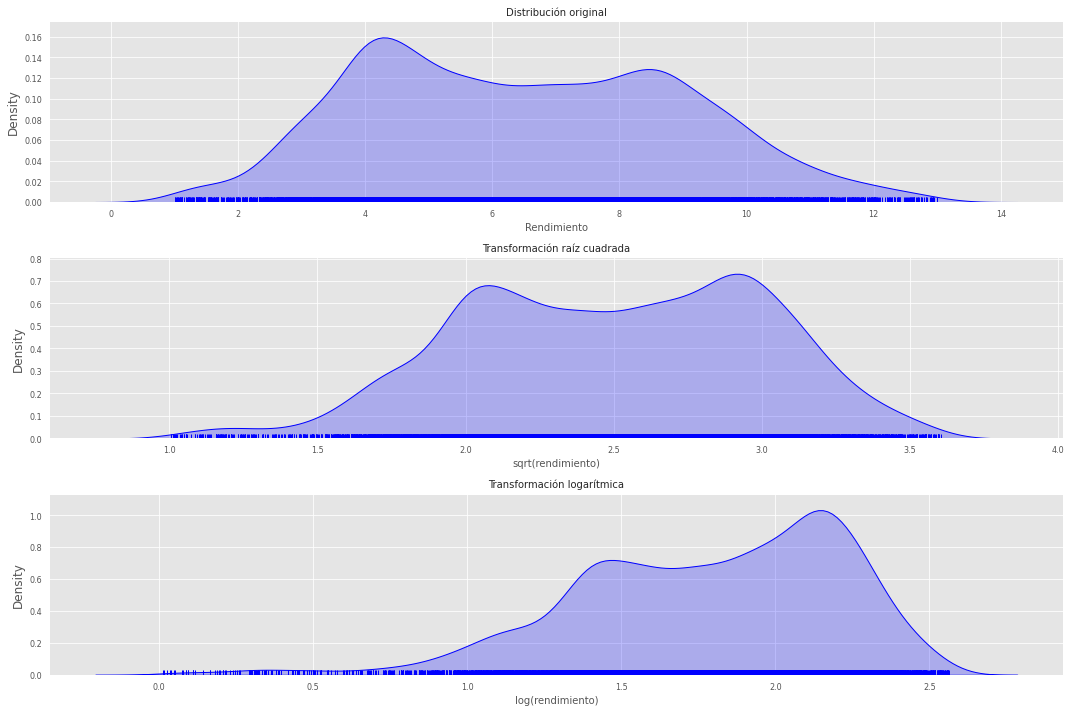

In [51]:
import warnings
warnings.filterwarnings('ignore')



fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))
sns.distplot(
    train.rend,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('Rendimiento', fontsize='medium') 
axes[0].tick_params(labelsize = 8)

sns.distplot(
    np.sqrt(train.rend),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(rendimiento)', fontsize='medium') 
axes[1].tick_params(labelsize = 8)

sns.distplot(
    np.log(train.rend),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(rendimiento)', fontsize='medium') 
axes[2].tick_params(labelsize = 8)

fig.tight_layout()
plt.show()

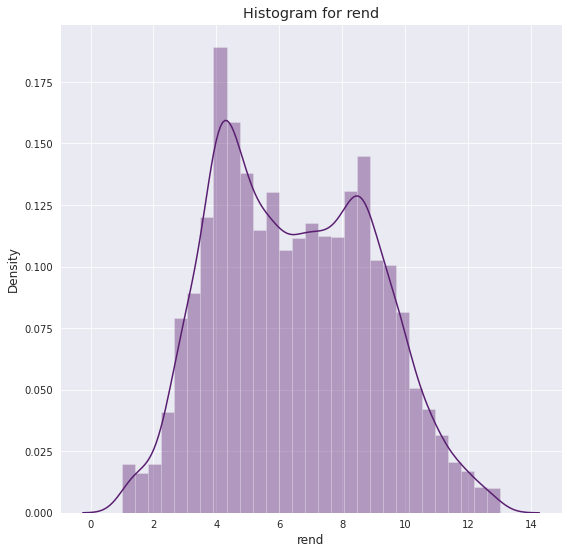

In [52]:
# Setting the grid style
sns.set_style('darkgrid')
sns.set_color_codes(palette='dark')

# Setting plot area
f, ax = plt.subplots(figsize=(9, 9))

# plotting the distribution plot
sns.distplot(train['rend'], color="m", axlabel='rend')
ax.set(title="Histogram for rend")
plt.show()

### Grafico de distribucion para cada variable numerica

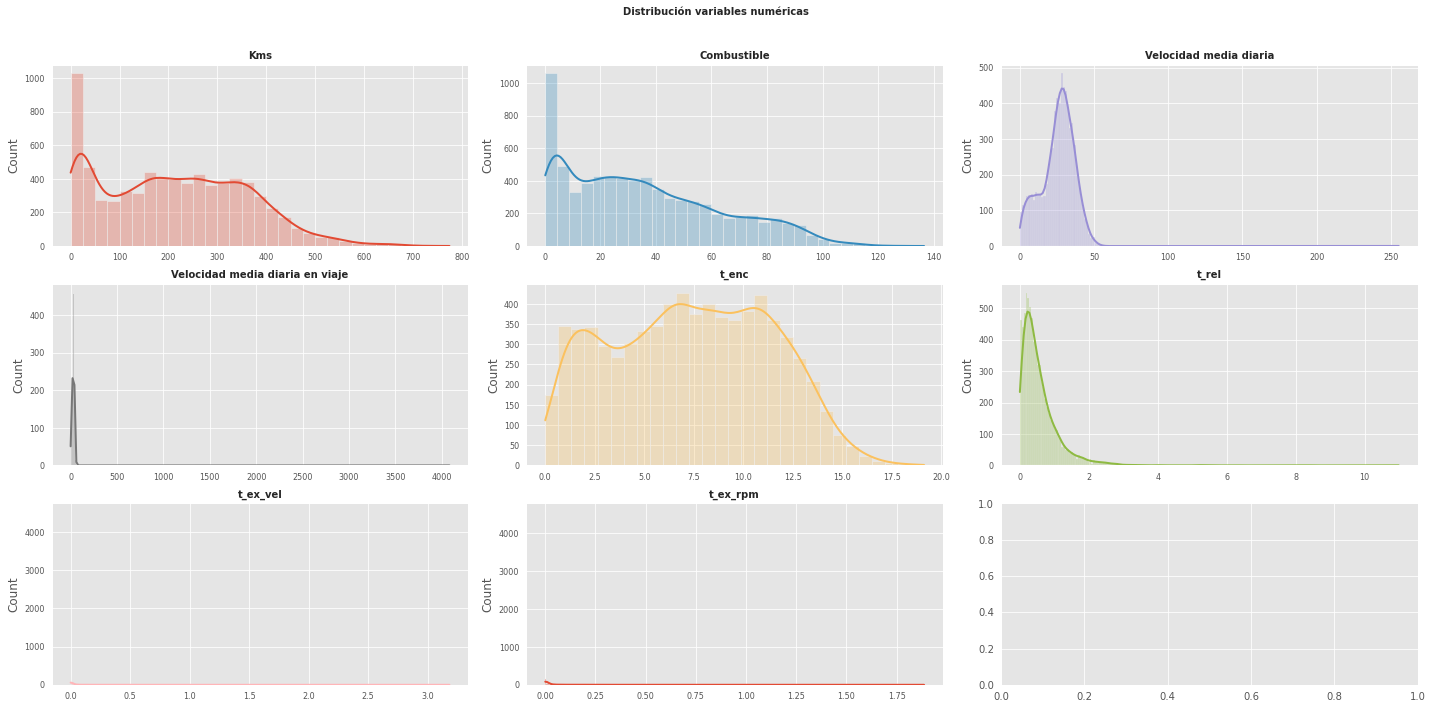

In [53]:
from matplotlib import style
import matplotlib.ticker as ticker

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')



# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))
axes = axes.flat
columnas_numeric = train.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('rend')
columnas_numeric = columnas_numeric.drop('Unnamed: 0')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = train,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

### Grafico de Correlacion con rendimeinto 

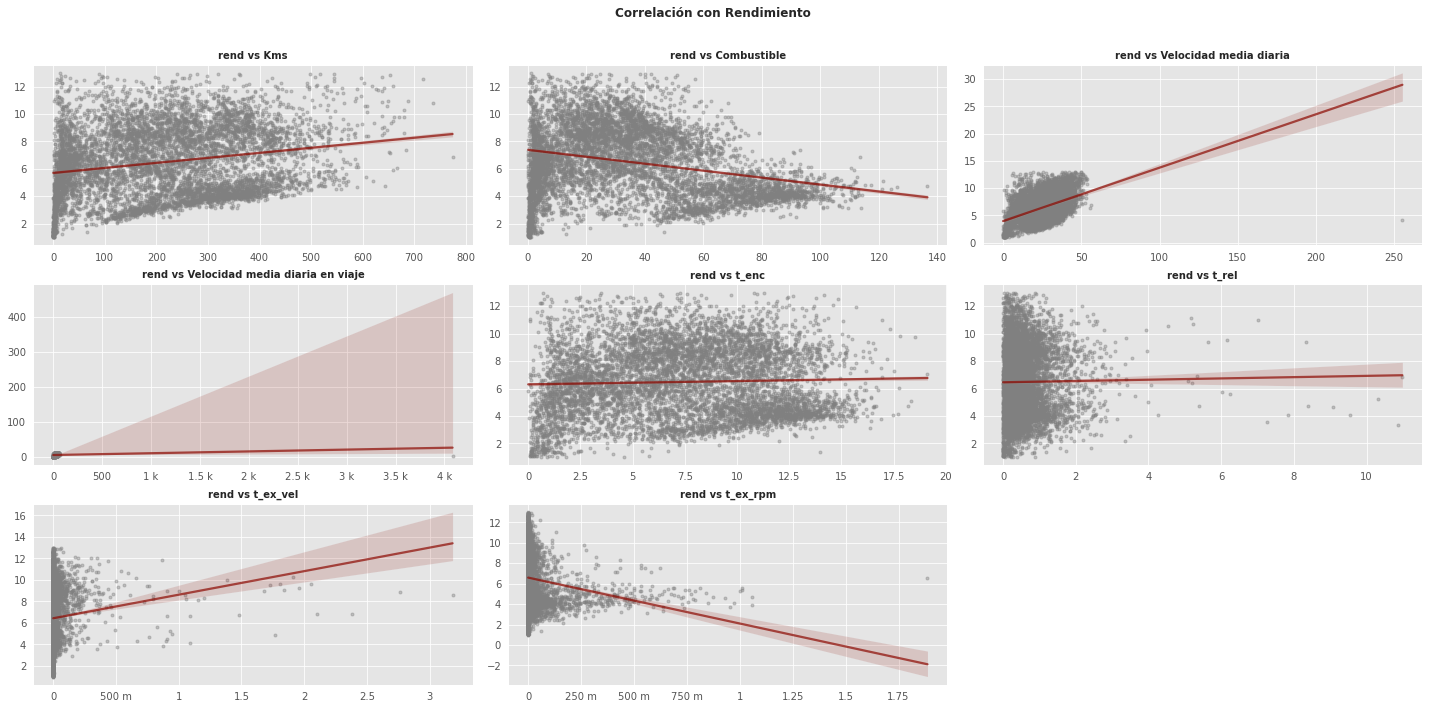

In [54]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))
axes = axes.flat
columnas_numeric = train.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('rend')
columnas_numeric = columnas_numeric.drop('Unnamed: 0')


for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = train[colum],
        y           = train['rend'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"rend vs {colum}", fontsize = 10, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con Rendimiento', fontsize = 12, fontweight = "bold");

### Matriz de Correlacion 

In [55]:
corr_matrix=train[['rend','Kms','Combustible', 'Velocidad media diaria',
       'Velocidad media diaria en viaje', 't_enc', 't_rel', 't_ex_vel',
       't_ex_rpm']]


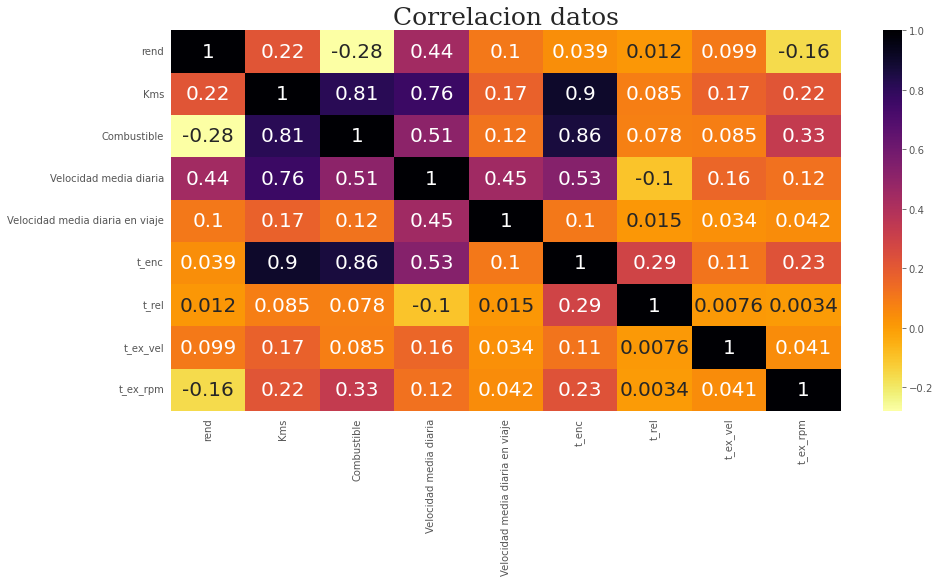

In [56]:
plt.figure(figsize=(15, 7))
plt.title('Correlacion datos',fontsize=25,fontname='serif')
sns.heatmap(corr_matrix.corr(),  annot=True,cmap="inferno_r", annot_kws={"size":20})
plt.show()

## Crea Variables categoricas y numericas

In [57]:
df_categorical  =  train[['Placa', 'Marca', 'Conductor', 'Ruta']]

df_numerical    =  train[['rend','Kms','Combustible', 'Velocidad media diaria',
       'Velocidad media diaria en viaje', 't_enc', 't_rel', 't_ex_vel',
       't_ex_rpm']]

## Crea DataFrame con retrazo 

In [58]:
r=-5
df_numerical=retraso(df_numerical,r)

In [59]:
df_numerical.head()

,rend,Kms,Combustible,Velocidad media diaria,Velocidad media diaria en viaje,t_enc,t_rel,t_ex_vel,t_ex_rpm
0,3.587365,63.03,17.57,18.09,21.59,3.484444,0.565000,0.000000,0.004167
1,4.841593,318.48,65.78,28.54,30.90,11.158056,0.850000,0.004444,0.009167
2,3.702703,13.70,3.70,6.58,9.59,2.080000,0.650833,0.000000,0.000000
3,9.116972,39.75,4.36,16.30,20.74,2.438333,0.521944,0.000000,0.000000
5,8.916968,24.70,2.77,9.88,16.19,2.499167,0.973333,0.000000,0.000000


In [60]:
train = df_numerical

#train = pd.concat([df_numerical,df_categorical], axis=1)

#print(train.shape)

In [61]:
#df_categorical  =  train[['Placa', 'Marca', 'Conductor', 'Ruta']]

#df_numerical    =  train[['Kms','Combustible', 'Velocidad media diaria',
#       'Velocidad media diaria en viaje', 't_enc', 't_rel', 't_ex_vel',
#       't_ex_rpm']]

## **2) Creación de pipeline (10 puntos)**

## Crea pipeline Numerico 

In [62]:
numeric_pipeline = Pipeline(
    [
        ('Imputación con la media',   SimpleImputer(strategy='mean')),
        ('Escalado minmax', MinMaxScaler())
        
    ]
)

## Crea pipeline categorico 

In [63]:

categorical_pipeline = Pipeline(
        [
            ('imputación moda', SimpleImputer(strategy='most_frequent')),
            ('onehot encoder', OneHotEncoder(sparse=False))
        ]

)

## Crea pipeline transformer 

In [64]:
column_transformer = ColumnTransformer(
            [
                ('numeric pipeline', numeric_pipeline, [0,1,2,3,4,5,6,7])] )

In [65]:
df_numerical.columns


Index(['rend', 'Kms', 'Combustible', 'Velocidad media diaria',
       'Velocidad media diaria en viaje', 't_enc', 't_rel', 't_ex_vel',
       't_ex_rpm'],
      dtype='object')

In [66]:
df_categorical.columns

Index(['Placa', 'Marca', 'Conductor', 'Ruta'], dtype='object')

In [67]:
features=train.columns

features

Index(['rend', 'Kms', 'Combustible', 'Velocidad media diaria',
       'Velocidad media diaria en viaje', 't_enc', 't_rel', 't_ex_vel',
       't_ex_rpm'],
      dtype='object')

## Seleccion de las caracteristicas 

In [68]:
X_train = train.drop(["rend"], axis=1)
y_train = train['rend']

X_test = test.drop(["rend"], axis=1)
y_test = test['rend']

## Pipeline Final 

In [69]:


final_pipeline = Pipeline(
[("preprocesamiento",column_transformer),
('modelo', RandomForestRegressor())
]
)

## **3) Evaluación de modelos usando validación cruzada (incluyendo pipeline) (5 puntos)**

In [70]:
model=final_pipeline.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [71]:
results = cross_validate(final_pipeline, X_train, y_train, cv=10, return_train_score=True, scoring=['r2'])

In [72]:
print('train:', results['train_r2'].mean(), '+-', results['train_r2'].std())

train: 0.9970785413629077 +- 0.00018819225794395887


## **4) Ajuste de hiperparámetros de los modelos seleccionados (5 puntos)**

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
grid = {'n_estimators': [50,100,200],'max_depth': [2,3,5, 10]}

In [75]:
X_transformed = column_transformer.fit_transform(X_train)

In [76]:
grid_search =GridSearchCV(
RandomForestRegressor(),
param_grid=grid, 
cv=10,
scoring='r2')

In [77]:
grid_search.fit(X_transformed, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

## **5) Creación de Joblib**

### Entrenamiento Final 

In [78]:
final_pipeline = Pipeline(
[("preprocesamiento",column_transformer),
('modelo', RandomForestRegressor())
]
)

In [79]:


final_pipeline.fit(X_train.to_numpy(),y_train.to_numpy())



Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('numeric pipeline',
                                                  Pipeline(steps=[('Imputación '
                                                                   'con la '
                                                                   'media',
                                                                   SimpleImputer()),
                                                                  ('Escalado '
                                                                   'minmax',
                                                                   MinMaxScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7])])),
                ('modelo', RandomForestRegressor())])

In [80]:
X_train

,Kms,Combustible,Velocidad media diaria,Velocidad media diaria en viaje,t_enc,t_rel,t_ex_vel,t_ex_rpm
0,63.03,17.57,18.09,21.59,3.484444,0.565000,0.000000,0.004167
1,318.48,65.78,28.54,30.90,11.158056,0.850000,0.004444,0.009167
2,13.70,3.70,6.58,9.59,2.080000,0.650833,0.000000,0.000000
3,39.75,4.36,16.30,20.74,2.438333,0.521944,0.000000,0.000000
5,24.70,2.77,9.88,16.19,2.499167,0.973333,0.000000,0.000000
...,...,...,...,...,...,...,...,...
7853,6.22,0.98,6.48,8.40,0.960833,0.219444,0.000000,0.000000
7854,177.87,39.86,25.72,32.53,6.915000,1.446111,0.005000,0.000000
7855,298.10,68.37,30.43,33.61,9.796667,0.927222,0.028611,0.045278
7856,171.90,24.86,26.70,32.13,6.438889,1.088333,0.000000,0.071111


In [81]:
joblib.dump(final_pipeline, "rend2.joblib")

['rend2.joblib']

In [82]:
modelo=joblib.load('rend2.joblib')

In [83]:
#test_f=pd.read_csv('test_f2.csv')

In [84]:
test_f = [[100,10,25,30,4,1,0.0,0.0]]

In [85]:
test_f

[[100, 10, 25, 30, 4, 1, 0.0, 0.0]]

In [86]:
modelo.predict(test_f)

array([10.11941307])